In [4]:
print('ROCK HJS')

ROCK HJS


<H1> DATA READING </H1>
*italicized text*

In [5]:
import pandas as pd
data = pd.read_csv('sstar_data.csv')
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [6]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/1IgffHaJT99vno_6BnG8SML9tBcj7a3hjNU44oFJer5A#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


<h1> DATA VISULATIZATION<H1>


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
sns.set(style="whitegrid")


<h1> STAR VS GALAXY DISTRIBUTION OBSERVATOIN</h1>
<H5> STARS = 4.1K</H5>
<H6>GALAXY = 5K</H6>
<H5>QSO(OTHER) =LESS THAN 1K</H5>


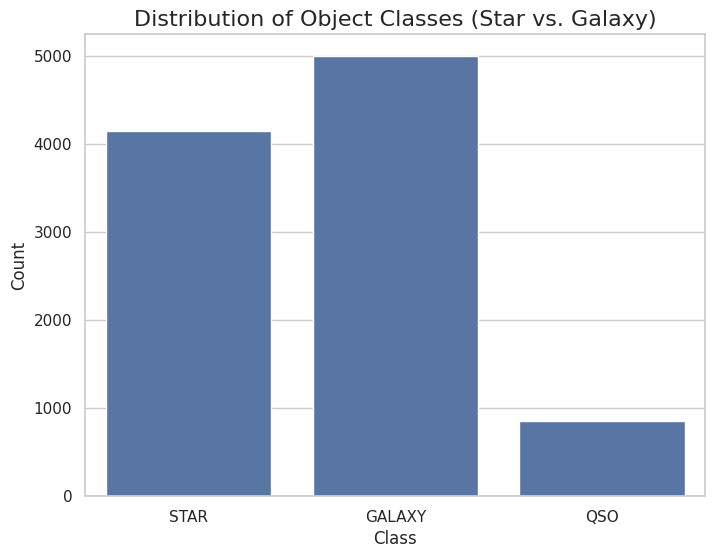

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=data)
plt.title('Distribution of Object Classes (Star vs. Galaxy)', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

<H1>Scatter plot of Right Ascension vs. Declination (RA vs. Dec)</H1>

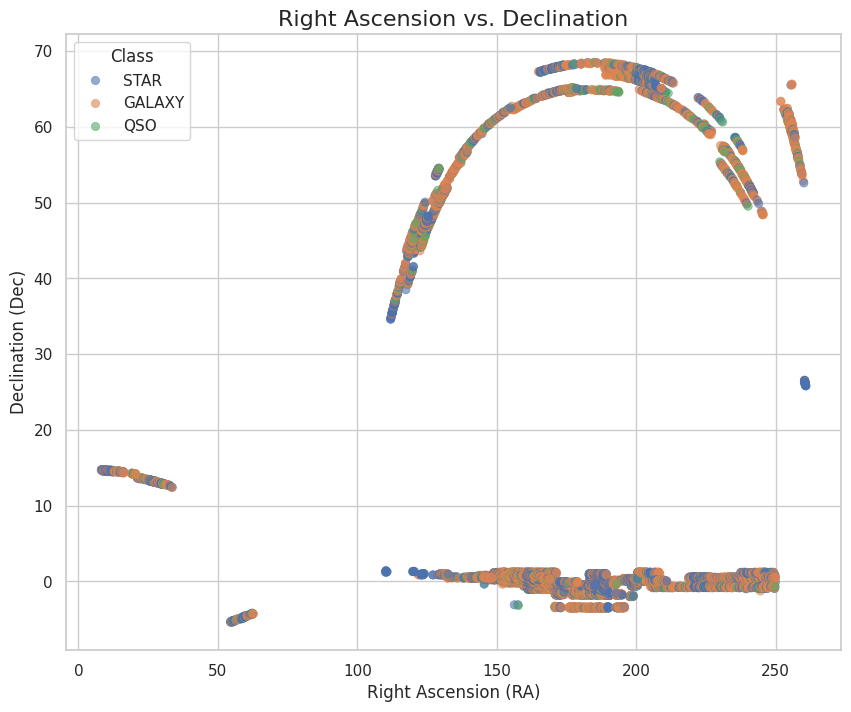

In [11]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='ra', y='dec', hue='class', data=data, alpha=0.6, edgecolor=None)
plt.title('Right Ascension vs. Declination', fontsize=16)
plt.xlabel('Right Ascension (RA)', fontsize=12)
plt.ylabel('Declination (Dec)', fontsize=12)
plt.legend(title="Class")
plt.show()

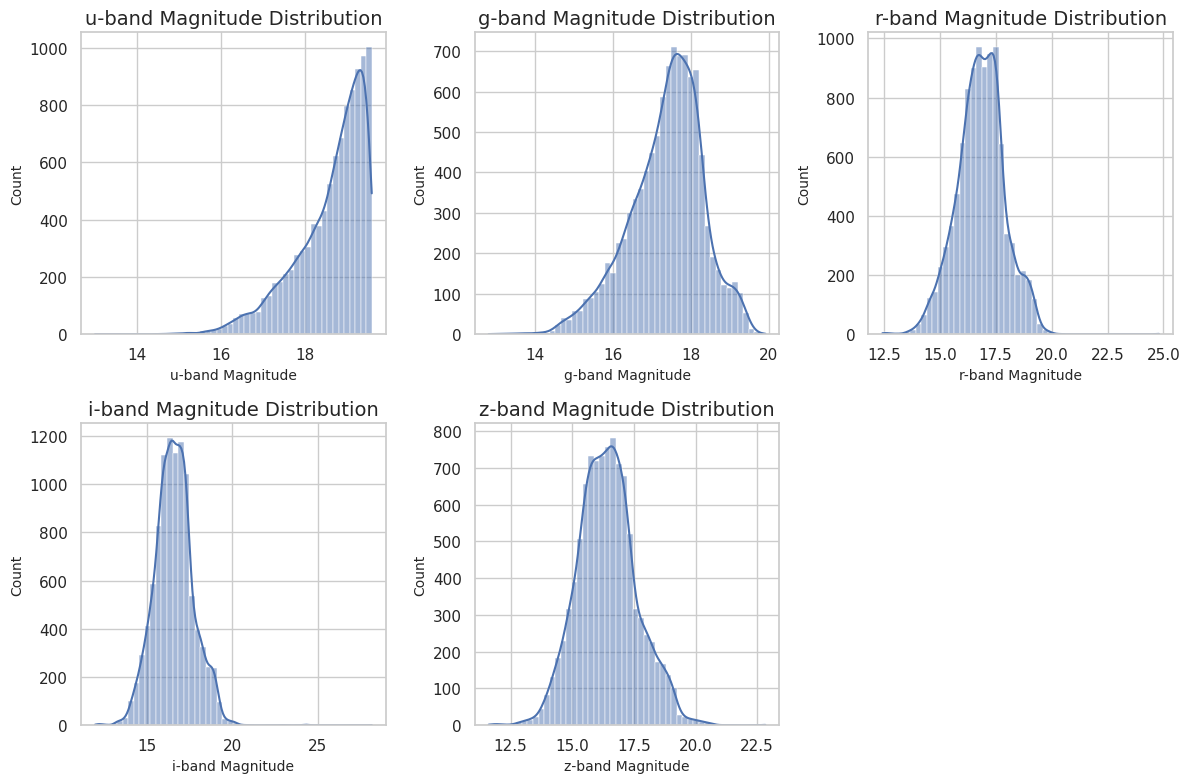

In [12]:
bands = ['u', 'g', 'r', 'i', 'z']
plt.figure(figsize=(12, 8))
for i, band in enumerate(bands):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data[band], bins=50, kde=True)
    plt.title(f'{band}-band Magnitude Distribution', fontsize=14)
    plt.xlabel(f'{band}-band Magnitude', fontsize=10)
    plt.ylabel('Count', fontsize=10)

plt.tight_layout()
plt.show()

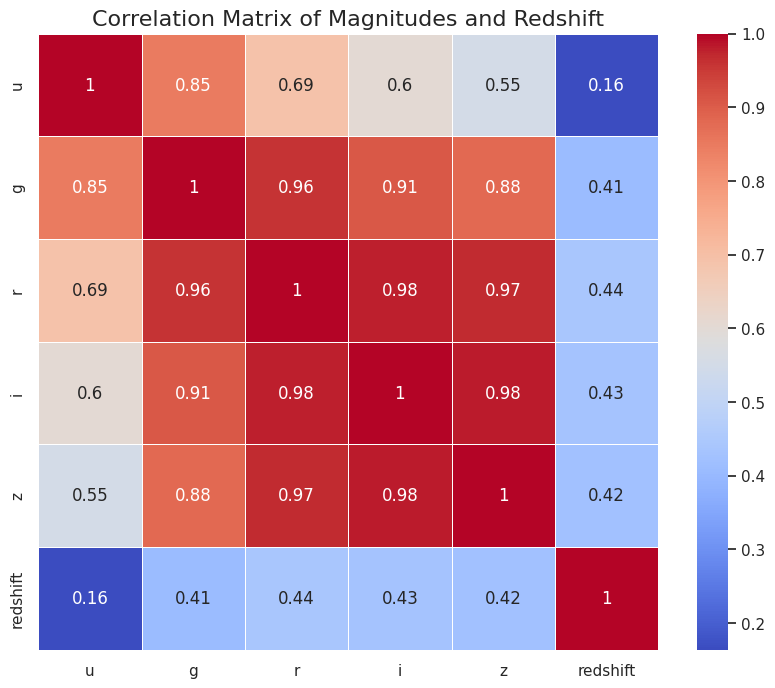

In [13]:
plt.figure(figsize=(10, 8))
corr = data[['u', 'g', 'r', 'i', 'z', 'redshift']].corr()  # Correlation of magnitudes and redshift
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Magnitudes and Redshift', fontsize=16)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) th

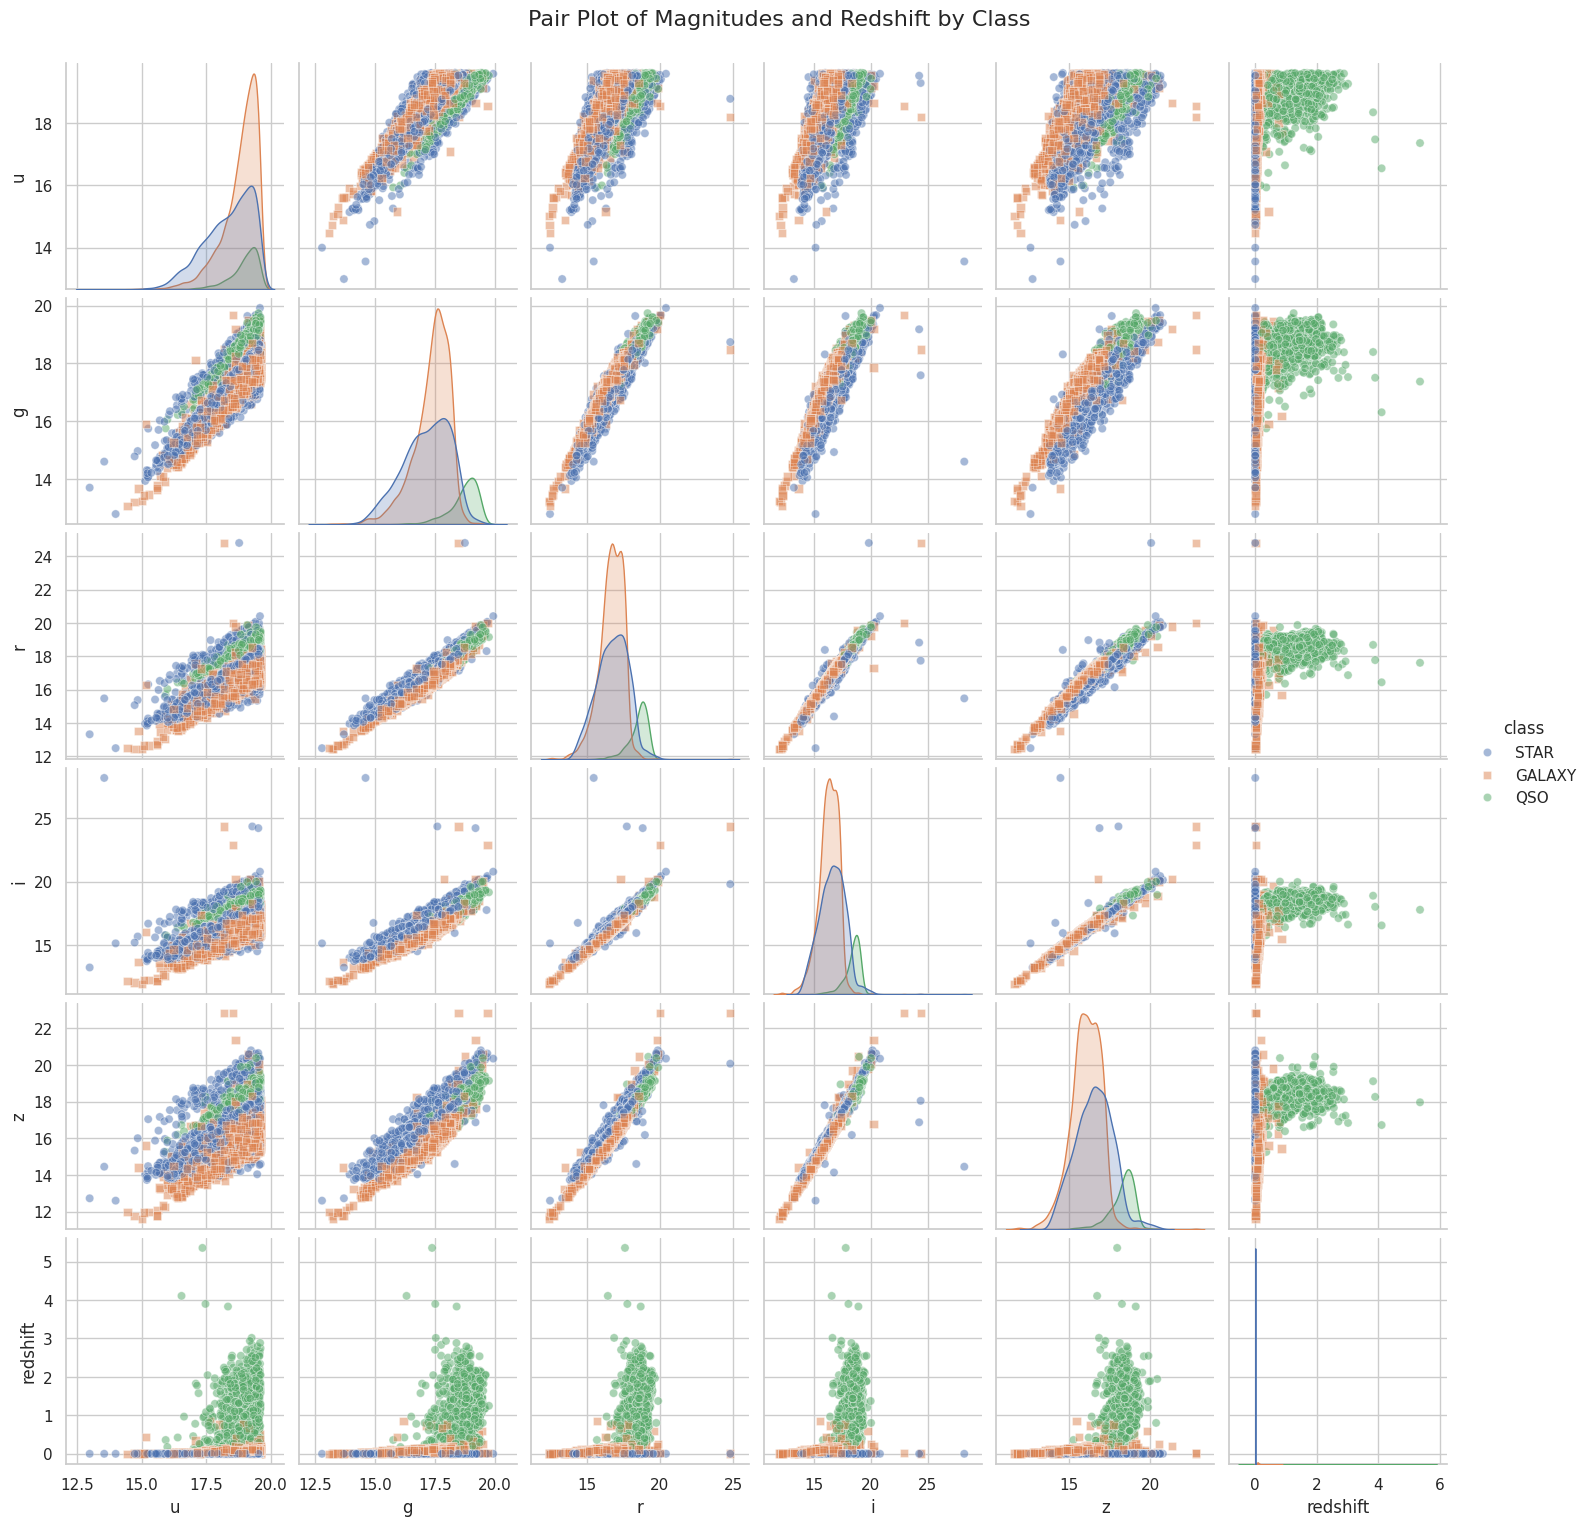

In [14]:
sns.pairplot(data[['u', 'g', 'r', 'i', 'z', 'redshift', 'class']], hue='class', markers=["o", "s"], plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Magnitudes and Redshift by Class', y=1.02, fontsize=16)
plt.show()

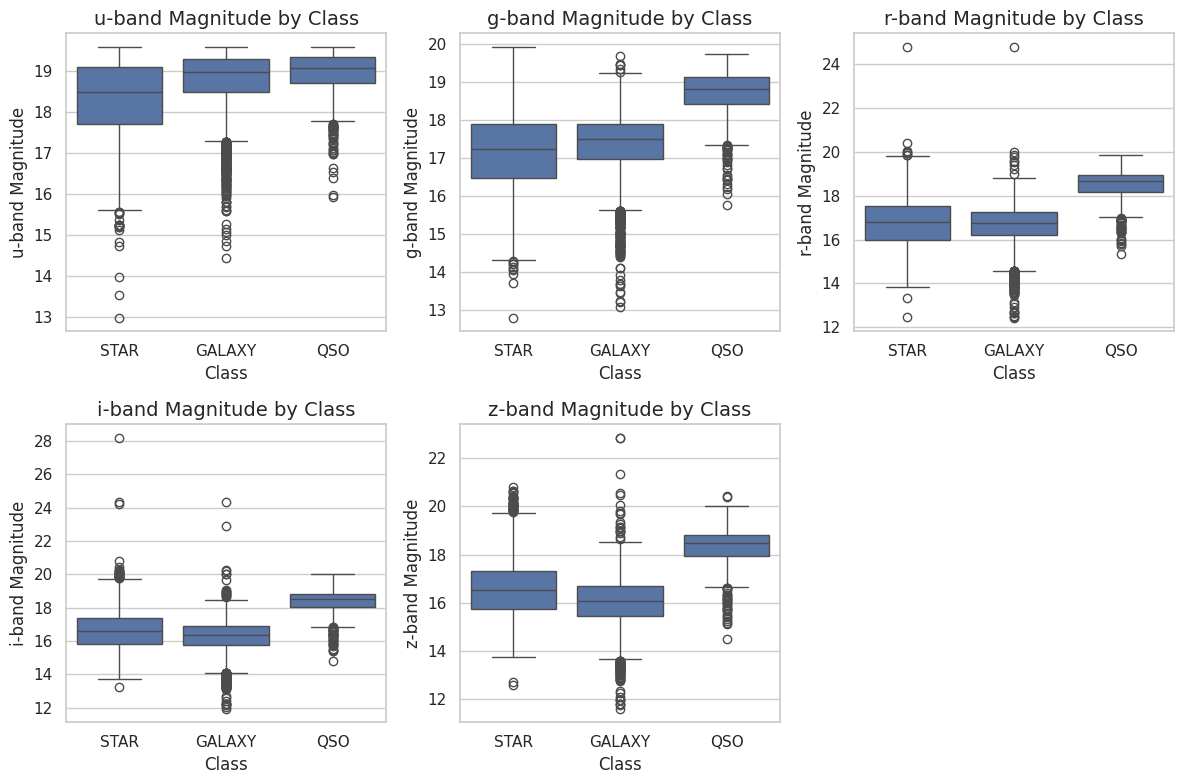

In [15]:
plt.figure(figsize=(12, 8))
for i, band in enumerate(bands):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='class', y=band, data=data)
    plt.title(f'{band}-band Magnitude by Class', fontsize=14)
    plt.xlabel('Class', fontsize=12)
    plt.ylabel(f'{band}-band Magnitude', fontsize=12)

plt.tight_layout()
plt.show()

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
data['g-r'] = data['g'] - data['r']
data['r-i'] = data['r'] - data['i']
data['i-z'] = data['i'] - data['z']
data['u-g'] = data['u'] - data['g']
data['log_redshift'] = np.log1p(data['redshift'])  # Use log1p to avoid log(0)
features_to_scale = ['u', 'g', 'r', 'i', 'z', 'g-r', 'r-i', 'i-z', 'u-g', 'log_redshift']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features_to_scale])
scaled_features_df = pd.DataFrame(scaled_features, columns=features_to_scale)
data_scaled = pd.concat([scaled_features_df, data[['class']]], axis=1)
print(data_scaled.tail())


             u         g         r         i         z       g-r       r-i  \
9995  0.239453  0.104292  0.069416  0.087121  0.068876  0.077599 -0.103576   
9996 -0.418536  0.070402  0.220993  0.116515  0.229516 -0.536935  0.420473   
9997  0.167538  0.429347  0.634775  0.743983  0.829211 -0.861666 -0.701364   
9998  0.318018  0.569857  0.646764  0.682516  0.595986 -0.481180 -0.362374   
9999  0.792292  0.006726 -0.501581 -0.655223 -0.762141  1.717645  0.868334   

           i-z       u-g  log_redshift   class  
9995  0.071074  0.199689     -0.333288  GALAXY  
9996 -0.612577 -0.826962      0.043914  GALAXY  
9997 -0.634408 -0.534319     -0.457086    STAR  
9998  0.266312 -0.550624     -0.392866  GALAXY  
9999  0.722793  1.300660      0.046501  GALAXY  


In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter

# Split the data
X = data_scaled.drop(columns=['class'])
y = data_scaled['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_features_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

X_features_df.to_csv('RF_X_features.csv', index=False)
y_df.to_csv('RF_y.csv', index=False)

In [18]:
class SimpleDecisionTree:
    # Decision tree logic  sklearn's DecisionTreeClassifier
    def __init__(self, max_depth=None):
        from sklearn.tree import DecisionTreeClassifier
        self.tree = DecisionTreeClassifier(max_depth=max_depth)

    def fit(self, X, y):
        self.tree.fit(X, y)

    def predict(self, X):
        return self.tree.predict(X)

In [19]:
class RandomForest:
    def __init__(self, n_trees=10, max_depth=None):
        self.n_trees = n_trees
        self.trees = [SimpleDecisionTree(max_depth=max_depth) for _ in range(n_trees)]

    def fit(self, X, y):
        for tree in self.trees:
            # Bootstrapping: sample with replacement
            indices = np.random.choice(len(X), len(X), replace=True)
            X_sample, y_sample = X.iloc[indices], y.iloc[indices]
            tree.fit(X_sample, y_sample)
    def predict(self, X):
        # Aggregate predictions
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        majority_vote = [Counter(tree_preds[:, i]).most_common(1)[0][0] for i in range(X.shape[0])]
        return np.array(majority_vote)
rf = RandomForest(n_trees=10, max_depth=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

Random Forest accuracy: 99.07%

Prevalence of Galaxies (Class 'GALAXY'): 0.499
Prevalence of Quasars (Class 'QSO'): 0.09533333333333334
Prevalence of Stars (Class 'STAR'): 0.4056666666666667


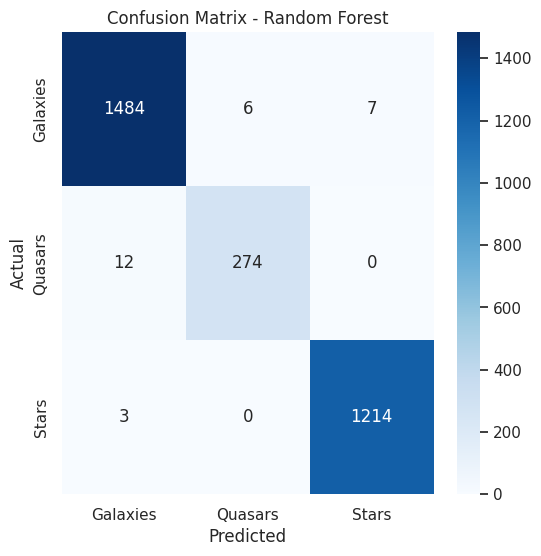


Random Forest Classifier - Classification Report:
              precision    recall  f1-score   support

    Galaxies       0.99      0.99      0.99      1497
     Quasars       0.98      0.96      0.97       286
       Stars       0.99      1.00      1.00      1217

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print("Random Forest accuracy: {:.2f}%".format(accuracy * 100))

# Prevalence for each class using string labels
total_cases = len(y_test)
prevalence_galaxy = np.sum(y_test == 'GALAXY') / total_cases
prevalence_quasar = np.sum(y_test == 'QSO') / total_cases
prevalence_star = np.sum(y_test == 'STAR') / total_cases

print("\nPrevalence of Galaxies (Class 'GALAXY'):", prevalence_galaxy)
print("Prevalence of Quasars (Class 'QSO'):", prevalence_quasar)
print("Prevalence of Stars (Class 'STAR'):", prevalence_star)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display Confusion Matrix using Seaborn heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Galaxies', 'Quasars', 'Stars'],
            yticklabels=['Galaxies', 'Quasars', 'Stars'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Classification Report
print("\nRandom Forest Classifier - Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Galaxies', 'Quasars', 'Stars']))


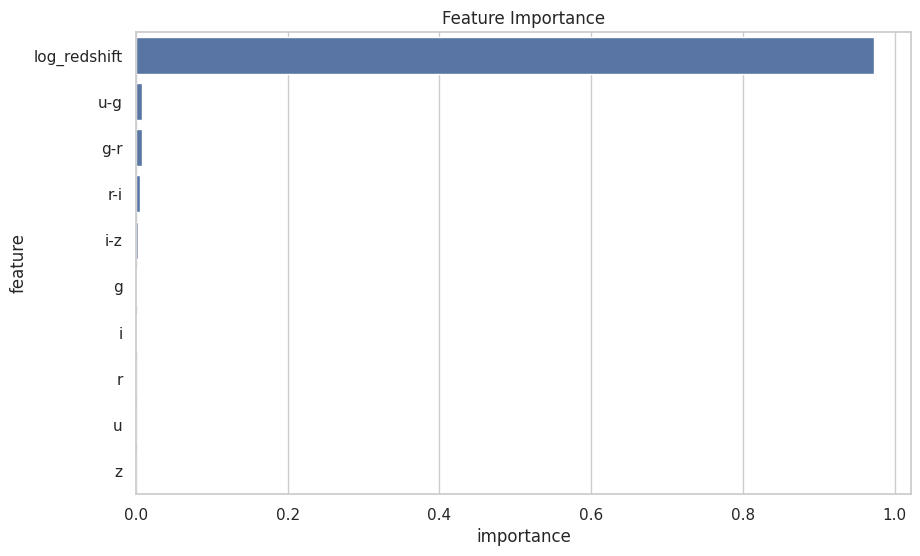

In [21]:
importances = rf.trees[0].tree.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


In [22]:
import pickle

with open('final_random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rf, model_file)

print("Model saved successfully!")


Model saved successfully!
